In [50]:
import pandas as pd
import numpy as np
import tensorflow as tf
tf.__version__
from typing import Dict, Text

In [51]:
data = pd.read_csv('gabungan_all.csv')
data

,Unnamed: 0,Source,Place,Rating,Jumlah review,Type,Address,description,Komentar,Kota
0,0,https://www.google.com/maps/place/'@Jktgoodgui...,@Jktgoodguide,None,None,Tujuan Wisata,"Jl. Kb. Pala I No.295, RT.5/RW.16",Museum terkenal dengan pameran memorial,None,Jakarta
1,1,https://www.google.com/maps/place/Wisata+Serib...,Wisata Seribu PolisiTidur,"4,2",(6),Tujuan Wisata,"Mahoni No.93, RT.4/RW.4",Pameran budaya bahari di Indonesia,"""Anjay udah jadi wisata aja""",Jakarta
2,2,https://www.google.com/maps/place/Tempat+Santa...,Tempat Santai Pinggir Kali Gusuran,None,None,Tujuan Wisata,"PQX9+M2P, Jl. Inspeksi",Masjid bernuansa damai berdesain Belanda,None,Jakarta
3,3,https://www.google.com/maps/place/Kaai%E2%80%9...,Kaai’s house,None,None,Tujuan Wisata,"Gg. H. Ali No.18, RW.5",None,None,Jakarta
4,4,https://www.google.com/maps/place/FEBRI+%26+IF...,FEBRI & IFAN,None,None,Tujuan Wisata,"RVC4+4VC, Jl. Rw. Sel. 2, RT.9/RW.7",Monumen peringatan peristiwa bersejarah,None,Jakarta
...,...,...,...,...,...,...,...,...,...,...
404,438,https://www.google.com/maps/place/Masok/data=!...,Masok,None,None,Taman,Jl. Setia Budi No.12,None,None,Semarang
405,439,https://www.google.com/maps/place/Taman+Pantai...,Taman Pantai Indah,"4,5",(18),Area Rekreasi Alam,"VRGR+C4V, Unnamed Road, RW.10",None,None,Jakarta
406,440,https://www.google.com/maps/place/Explore+Wisa...,Explore Wisata Alam,None,None,Area Rekreasi Alam,"Jln kemuning 1 Rt.007 /06 No.32D, RT.7/RW.6",None,None,Jakarta
407,441,https://www.google.com/maps/place/Desa+Wisata+...,Desa Wisata Lerep,"4,6",(488),Area Rekreasi Alam,RT.02/RW.2,None,"""Sukses terus DESA WISATA LEREP 😊""",Semarang


In [52]:
data = data.drop(columns=['Source', 'Unnamed: 0'])
data

,Place,Rating,Jumlah review,Type,Address,description,Komentar,Kota
0,@Jktgoodguide,None,None,Tujuan Wisata,"Jl. Kb. Pala I No.295, RT.5/RW.16",Museum terkenal dengan pameran memorial,None,Jakarta
1,Wisata Seribu PolisiTidur,"4,2",(6),Tujuan Wisata,"Mahoni No.93, RT.4/RW.4",Pameran budaya bahari di Indonesia,"""Anjay udah jadi wisata aja""",Jakarta
2,Tempat Santai Pinggir Kali Gusuran,None,None,Tujuan Wisata,"PQX9+M2P, Jl. Inspeksi",Masjid bernuansa damai berdesain Belanda,None,Jakarta
3,Kaai’s house,None,None,Tujuan Wisata,"Gg. H. Ali No.18, RW.5",None,None,Jakarta
4,FEBRI & IFAN,None,None,Tujuan Wisata,"RVC4+4VC, Jl. Rw. Sel. 2, RT.9/RW.7",Monumen peringatan peristiwa bersejarah,None,Jakarta
...,...,...,...,...,...,...,...,...
404,Masok,None,None,Taman,Jl. Setia Budi No.12,None,None,Semarang
405,Taman Pantai Indah,"4,5",(18),Area Rekreasi Alam,"VRGR+C4V, Unnamed Road, RW.10",None,None,Jakarta
406,Explore Wisata Alam,None,None,Area Rekreasi Alam,"Jln kemuning 1 Rt.007 /06 No.32D, RT.7/RW.6",None,None,Jakarta
407,Desa Wisata Lerep,"4,6",(488),Area Rekreasi Alam,RT.02/RW.2,None,"""Sukses terus DESA WISATA LEREP 😊""",Semarang


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
dict_places = {}
index = 0
for ids in sorted(data["Place"].unique()):
    dict_places[ids] = index
    index += 1

dict_user = {}
index = 0
for ids in sorted(data["Komentar"].unique()):
    dict_user[ids] = index
    index += 1

In [55]:
data['place_ids'] = data["Place"].map(dict_places)
data['user_ids'] = data["Komentar"].map(dict_user)
data['Rating'] = data['Rating'].replace('None', 0)
data['Rating'] = data['Rating'].str.replace(',', '.').astype(float)


In [56]:
n_users, n_places = len(data['user_ids'].unique()), len(data['place_ids'].unique())

In [57]:
data['Rating'] = data['Rating'].fillna(data['Rating'].mean())
data

,Place,Rating,Jumlah review,Type,Address,description,Komentar,Kota,place_ids,user_ids
0,@Jktgoodguide,4.446819,None,Tujuan Wisata,"Jl. Kb. Pala I No.295, RT.5/RW.16",Museum terkenal dengan pameran memorial,None,Jakarta,1,271
1,Wisata Seribu PolisiTidur,4.200000,(6),Tujuan Wisata,"Mahoni No.93, RT.4/RW.4",Pameran budaya bahari di Indonesia,"""Anjay udah jadi wisata aja""",Jakarta,396,21
2,Tempat Santai Pinggir Kali Gusuran,4.446819,None,Tujuan Wisata,"PQX9+M2P, Jl. Inspeksi",Masjid bernuansa damai berdesain Belanda,None,Jakarta,350,271
3,Kaai’s house,4.446819,None,Tujuan Wisata,"Gg. H. Ali No.18, RW.5",None,None,Jakarta,121,271
4,FEBRI & IFAN,4.446819,None,Tujuan Wisata,"RVC4+4VC, Jl. Rw. Sel. 2, RT.9/RW.7",Monumen peringatan peristiwa bersejarah,None,Jakarta,92,271
...,...,...,...,...,...,...,...,...,...,...
404,Masok,4.446819,None,Taman,Jl. Setia Budi No.12,None,None,Semarang,161,271
405,Taman Pantai Indah,4.500000,(18),Area Rekreasi Alam,"VRGR+C4V, Unnamed Road, RW.10",None,None,Jakarta,321,271
406,Explore Wisata Alam,4.446819,None,Area Rekreasi Alam,"Jln kemuning 1 Rt.007 /06 No.32D, RT.7/RW.6",None,None,Jakarta,91,271
407,Desa Wisata Lerep,4.600000,(488),Area Rekreasi Alam,RT.02/RW.2,None,"""Sukses terus DESA WISATA LEREP 😊""",Semarang,80,119


In [58]:
#split
X_train, X_test = train_test_split(data, test_size=0.33, random_state=42)

In [59]:
import keras
n_latent_factors_user = 8
n_latent_factors_place = 10
n_latent_factors_mf = 3
n_users, n_places = len(data['user_ids'].unique()), len(data['place_ids'].unique())

place_input = keras.layers.Input(shape=[1],name='Place')

place_embedding_mlp = keras.layers.Embedding(n_places + 1, n_latent_factors_place, name='Place-Embedding-MLP')(place_input)
place_vec_mlp = keras.layers.Flatten(name='FlattenPlaces-MLP')(place_embedding_mlp)
place_vec_mlp = keras.layers.Dropout(0.2)(place_vec_mlp)

place_embedding_mf = keras.layers.Embedding(n_places + 1, n_latent_factors_mf, name='Place-Embedding-MF')(place_input)
place_vec_mf = keras.layers.Flatten(name='FlattenPlaces-MF')(place_embedding_mf)
place_vec_mf = keras.layers.Dropout(0.2)(place_vec_mf)


user_input = keras.layers.Input(shape=[1],name='User')

user_embedding_mlp = keras.layers.Embedding(n_users + 1, n_latent_factors_user,name='User-Embedding-MLP')(user_input)
user_vec_mlp = keras.layers.Flatten(name='FlattenUsers-MLP')(user_embedding_mlp)
user_vec_mlp = keras.layers.Dropout(0.2)(user_vec_mlp)

user_embedding_mf = keras.layers.Embedding(n_users + 1, n_latent_factors_mf,name='User-Embedding-MF')(user_input)
user_vec_mf = keras.layers.Flatten(name='FlattenUsers-MF')(user_embedding_mf)
user_vec_mf = keras.layers.Dropout(0.2)(user_vec_mf)


concat = keras.layers.Concatenate(axis=-1, name='Concat')([place_vec_mlp, user_vec_mlp])
concat_dropout = keras.layers.Dropout(0.2)(concat)
dense = keras.layers.Dense(200,name='FullyConnected')(concat_dropout)
dense_batch = keras.layers.BatchNormalization(name='Batch')(dense)
dropout_1 = keras.layers.Dropout(0.2,name='Dropout-1')(dense_batch)
dense_2 = keras.layers.Dense(100,name='FullyConnected-1')(dropout_1)
dense_batch_2 = keras.layers.BatchNormalization(name='Batch-2')(dense_2)

dropout_2 = keras.layers.Dropout(0.2,name='Dropout-2')(dense_batch_2)
dense_3 = keras.layers.Dense(50,name='FullyConnected-2')(dropout_2)
dense_4 = keras.layers.Dense(20,name='FullyConnected-3', activation='relu')(dense_3)

pred_mf = keras.layers.Dot(axes=1, name='Dot')([place_vec_mf, user_vec_mf])

pred_mlp = keras.layers.Dense(1, activation='relu',name='Activation')(dense_4)

combine_mlp_mf = keras.layers.Concatenate(axis=1, name='Concat-MF-MLP')([pred_mf, pred_mlp])
result_combine = keras.layers.Dense(100,name='Combine-MF-MLP')(combine_mlp_mf)
deep_combine = keras.layers.Dense(100,name='FullyConnected-4')(result_combine)


result = keras.layers.Dense(1, name='Prediction')(deep_combine)


model = keras.Model([user_input, place_input], result)
model.compile(optimizer='adam', loss= 'mean_absolute_error', metrics=['accuracy'])

In [60]:
from sklearn.metrics import mean_absolute_error
y_true = X_test['Rating']
y_hat_2 = np.round(model.predict([X_test['user_ids'], X_test['place_ids']]), 0)
print(mean_absolute_error(y_true, y_hat_2))

4.430969748374329


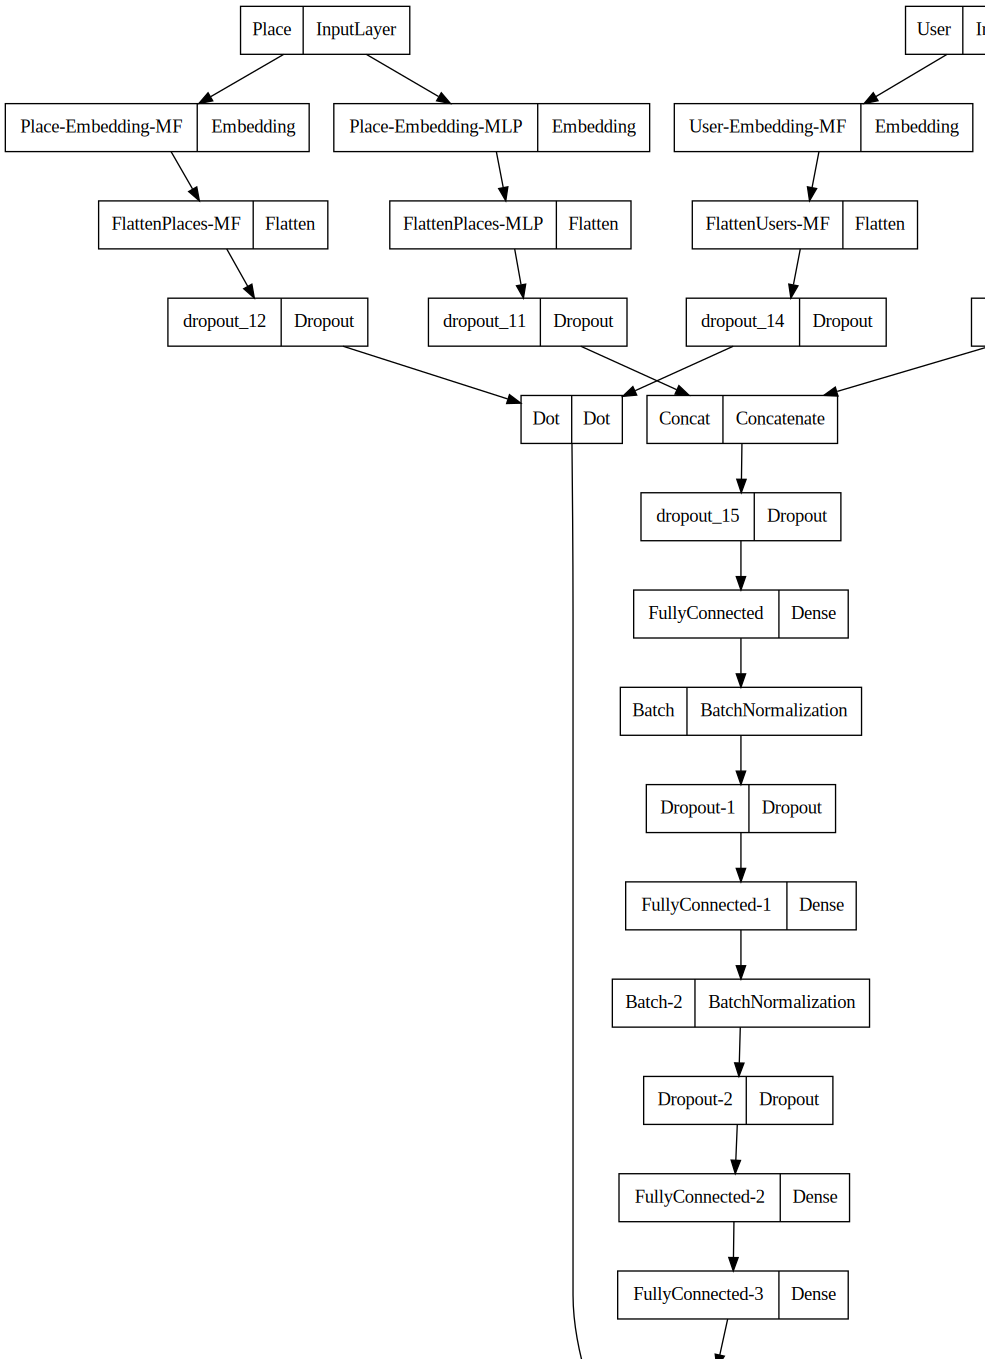

In [61]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,  show_shapes=False, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [62]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Place (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 User (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 Place-Embedding-MLP (Embedding  (None, 1, 10)       4080        ['Place[0][0]']                  
 )                                                                                                
                                                                                                  
 User-Embedding-MLP (Embedding)  (None, 1, 8)        2184        ['User[0][0]']             

In [63]:
history = model.fit([X_train['user_ids'], X_train['place_ids']], X_train['Rating'], epochs=500, validation_split=0.1)

Epoch 1/500
8/8 [==============================] - 2s 39ms/step - loss: 3.8171 - accuracy: 0.0000e+00 - val_loss: 4.1304 - val_accuracy: 0.0000e+00
Epoch 2/500
8/8 [==============================] - 0s 12ms/step - loss: 2.9268 - accuracy: 0.0000e+00 - val_loss: 3.8133 - val_accuracy: 0.0000e+00
Epoch 3/500
8/8 [==============================] - 0s 9ms/step - loss: 2.2847 - accuracy: 0.0000e+00 - val_loss: 3.6684 - val_accuracy: 0.0000e+00
Epoch 4/500
8/8 [==============================] - 0s 13ms/step - loss: 1.7579 - accuracy: 0.0000e+00 - val_loss: 3.2339 - val_accuracy: 0.0000e+00
Epoch 5/500
8/8 [==============================] - 0s 11ms/step - loss: 1.4572 - accuracy: 0.0000e+00 - val_loss: 3.1438 - val_accuracy: 0.0000e+00
Epoch 6/500
8/8 [==============================] - 0s 12ms/step - loss: 1.0423 - accuracy: 0.0000e+00 - val_loss: 2.8313 - val_accuracy: 0.0000e+00
Epoch 7/500
8/8 [==============================] - 0s 11ms/step - loss: 0.9362 - accuracy: 0.0000e+00 - val_loss:

In [64]:
input = data.drop(columns=['Rating', 'Jumlah review', 'Type', 'Komentar', 'Place'])
input

,Address,description,Kota,place_ids,user_ids
0,"Jl. Kb. Pala I No.295, RT.5/RW.16",Museum terkenal dengan pameran memorial,Jakarta,1,271
1,"Mahoni No.93, RT.4/RW.4",Pameran budaya bahari di Indonesia,Jakarta,396,21
2,"PQX9+M2P, Jl. Inspeksi",Masjid bernuansa damai berdesain Belanda,Jakarta,350,271
3,"Gg. H. Ali No.18, RW.5",None,Jakarta,121,271
4,"RVC4+4VC, Jl. Rw. Sel. 2, RT.9/RW.7",Monumen peringatan peristiwa bersejarah,Jakarta,92,271
...,...,...,...,...,...
404,Jl. Setia Budi No.12,None,Semarang,161,271
405,"VRGR+C4V, Unnamed Road, RW.10",None,Jakarta,321,271
406,"Jln kemuning 1 Rt.007 /06 No.32D, RT.7/RW.6",None,Jakarta,91,271
407,RT.02/RW.2,None,Semarang,80,119


In [65]:
output = data['Rating']
output

0      4.446819
1      4.200000
2      4.446819
3      4.446819
4      4.446819
         ...   
404    4.446819
405    4.500000
406    4.446819
407    4.600000
408    4.600000
Name: Rating, Length: 409, dtype: float64

In [66]:
X_train_input, X_test_input = train_test_split(input, test_size=0.33, random_state=42)
X_train_output, X_test_output = train_test_split(output, test_size=0.33, random_state=42)

In [67]:
X_train_input

,Address,description,Kota,place_ids,user_ids
250,C982+MJG,Buka,Lombok,389,141
180,"Jl. Walisongo No.KM, RW.10","Taman berkolam ikan, kolam & area main",Semarang,132,220
119,Jl. Pantai Kuta,None,Bali,149,166
198,Jl. Sumbing No.12,None,Semarang,246,32
208,Jalan Kuta Lombok,Buka 24 jam,Lombok,49,114
...,...,...,...,...,...
71,Jl. Kartika Plaza,Taman air dengan wahana & restoran,Bali,377,165
106,Jl. Melasti,Air terjun kecil dengan kolam rendam,Bali,217,38
270,"Jl. Nelayan Tim. No.8, RW.7",17th-century colonial bridge,Jakarta,81,67
348,"PPJV+VQJ, Jl. Panglima Sudirman",Iconic monument depicting bamboo spears,Surabaya,43,271


In [68]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=10000,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,
                                    output_mode="int",
                                    output_sequence_length=None,
                                    pad_to_max_tokens=True)
text_vectorizer

In [69]:
text_vectorizer.adapt(X_train_input['Address'].append(X_train_input['description']).append(X_train_input['Kota']))

In [70]:
from tensorflow.keras import layers

In [71]:
input_place = layers.Input(shape=(1,))
input_user = layers.Input(shape=(1,))
input_address = layers.Input(shape=(1, ), dtype=tf.string)
input_desc = layers.Input(shape=(1, ), dtype=tf.string)
input_kota = layers.Input(shape=(1, ), dtype=tf.string)

place_embedding = layers.Embedding(n_places, 1024)(input_place)
place_reshape = layers.Reshape((1024, ))(place_embedding)
user_embedding = layers.Embedding(n_users, 1024)(input_user)
user_reshape = layers.Reshape((1024, ))(user_embedding)

conc_1 = layers.Concatenate()([place_reshape, user_reshape])

address_vector = text_vectorizer(input_address)
desc_vector = text_vectorizer(input_desc)
kota_vector = text_vectorizer(input_kota)

address_embedding = layers.Embedding(10000, 1024)(address_vector)
desc_embedding = layers.Embedding(10000, 1024)(desc_vector)
kota_embedding = layers.Embedding(10000, 1024)(kota_vector)

conc_2 = layers.Concatenate(axis=1)([address_embedding, desc_embedding, kota_embedding])

dropout_1 = layers.Dropout(0.1)(conc_1)
dense_1 = layers.Dense(1024, activation="relu")(dropout_1)

LSTM_1 = layers.LSTM(1024, return_sequences=True)(conc_2)
LSTM_2 = layers.LSTM(1024)(LSTM_1)
flatten_1 = layers.Flatten()(LSTM_2)

conc_final = layers.Concatenate()([dense_1, flatten_1])
flatten_2 = layers.Flatten()(conc_final)
dense_2 = layers.Dense(1024, activation="relu")(flatten_2)
output = layers.Dense(1, activation="relu")(dense_2)

model_lstm = tf.keras.Model([input_place, input_user, input_address, input_desc, input_kota], output, name="Model_LSTM")

In [72]:
model_lstm.summary()

Model: "Model_LSTM"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_9 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 1)]          0           []                               
                                                                                         

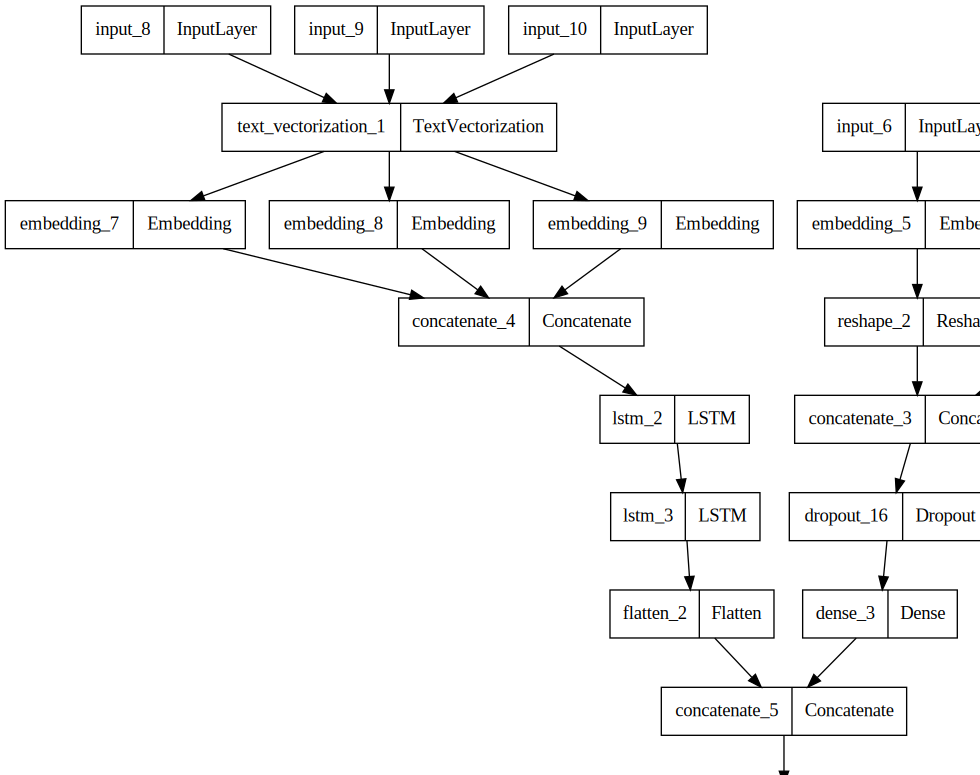

In [73]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model_lstm,  show_shapes=False, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [ ]:
from keras.utils import plot_model
plot_model(model_lstm, to_file='model_lstm.png')

In [74]:
model_lstm.compile(loss="mean_squared_error",
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=["mae"])

In [75]:
X_train_output

250    4.0
180    4.1
119    4.7
198    4.8
208    4.4
      ... 
71     4.7
106    4.7
270    4.4
348    4.6
102    4.7
Name: Rating, Length: 274, dtype: float64

In [76]:
history_lstm = model_lstm.fit([X_train_input['place_ids'], 
                               X_train_input['user_ids'], 
                               X_train_input['Address'], 
                               X_train_input['description'],
                               X_train_input['Kota']], X_train_output, epochs=500, validation_split=0.1, verbose=2)

Epoch 1/500
8/8 - 5s - loss: 11.4370 - mae: 3.2170 - val_loss: 3.4270 - val_mae: 1.3743 - 5s/epoch - 568ms/step
Epoch 2/500
8/8 - 0s - loss: 5.2180 - mae: 1.8626 - val_loss: 3.0473 - val_mae: 1.6593 - 363ms/epoch - 45ms/step
Epoch 3/500
8/8 - 0s - loss: 1.8462 - mae: 1.1445 - val_loss: 2.6499 - val_mae: 1.5541 - 365ms/epoch - 46ms/step
Epoch 4/500
8/8 - 0s - loss: 1.0199 - mae: 0.8410 - val_loss: 1.8362 - val_mae: 1.1751 - 367ms/epoch - 46ms/step
Epoch 5/500
8/8 - 0s - loss: 0.5751 - mae: 0.6168 - val_loss: 1.6944 - val_mae: 1.2251 - 359ms/epoch - 45ms/step
Epoch 6/500
8/8 - 0s - loss: 0.3260 - mae: 0.4801 - val_loss: 1.3800 - val_mae: 1.0478 - 369ms/epoch - 46ms/step
Epoch 7/500
8/8 - 0s - loss: 0.1335 - mae: 0.2973 - val_loss: 1.6837 - val_mae: 1.1752 - 363ms/epoch - 45ms/step
Epoch 8/500
8/8 - 0s - loss: 0.1124 - mae: 0.2665 - val_loss: 1.3719 - val_mae: 1.0372 - 361ms/epoch - 45ms/step
Epoch 9/500
8/8 - 0s - loss: 0.0826 - mae: 0.2334 - val_loss: 1.7875 - val_mae: 1.2509 - 357ms/ep

In [77]:
X_train_input

,Address,description,Kota,place_ids,user_ids
250,C982+MJG,Buka,Lombok,389,141
180,"Jl. Walisongo No.KM, RW.10","Taman berkolam ikan, kolam & area main",Semarang,132,220
119,Jl. Pantai Kuta,None,Bali,149,166
198,Jl. Sumbing No.12,None,Semarang,246,32
208,Jalan Kuta Lombok,Buka 24 jam,Lombok,49,114
...,...,...,...,...,...
71,Jl. Kartika Plaza,Taman air dengan wahana & restoran,Bali,377,165
106,Jl. Melasti,Air terjun kecil dengan kolam rendam,Bali,217,38
270,"Jl. Nelayan Tim. No.8, RW.7",17th-century colonial bridge,Jakarta,81,67
348,"PPJV+VQJ, Jl. Panglima Sudirman",Iconic monument depicting bamboo spears,Surabaya,43,271


In [78]:
model_lstm.evaluate([X_train_input['place_ids'][:2], 
                               X_train_input['user_ids'][:2], 
                               X_train_input['Address'][:2], 
                               X_train_input['description'][:2],
                               X_train_input['Kota'][:2]], X_train_output[:2])

1/1 [==============================] - 0s 32ms/step - loss: 0.0222 - mae: 0.1366


[0.022161295637488365, 0.13660597801208496]

In [79]:
dict_places

{'3D Art Magic Eye Museum': 0,
 '@Jktgoodguide': 1,
 'ALOHA BALI': 2,
 'Ade Irma Suryani Nasution Traffic Park': 3,
 'Air Panas Penatahan Kaja': 4,
 'Air Terjun Benang Kelambu': 5,
 'Air Terjun Curug Lawe Benowo Kalisidi': 6,
 'Air Terjun Goa Batu Emas': 7,
 'Air Terjun Gua Kopong Pringgasela Selatan': 8,
 'Air Terjun Gunung Janggot': 9,
 'Air Terjun Mangku Sakti': 10,
 'Air Terjun Munduk': 11,
 'Air Terjun Sekumpul': 12,
 'Air Terjun Semirang': 13,
 'Air Terjun Sendang Gile': 14,
 'Air Terjun Tiu Sekeper': 15,
 'Air terjun Tiu Kelep': 16,
 'Alam Santosa': 17,
 'Alas Kedaton': 18,
 'Alive Museum Ancol': 19,
 'Allianz Eco Park': 20,
 'Alun - Alun Surabaya': 21,
 'Alun Alun Tastura': 22,
 'Alun-Alun Kota Bandung': 23,
 'Amazing Artgames': 24,
 'Ancol': 25,
 'Andriupay': 26,
 'Anjungan Kota Semarang': 27,
 'Antique Market': 28,
 'Arca Joko Dolog': 29,
 'Armaya Wisata Alam': 30,
 'Arts - Crafts Ancol': 31,
 'Atlantis Water Adventures Ancol': 32,
 'Ayanaz Gedongsongo': 33,
 'BATU IDUNG': 34

In [97]:
tmp = [X_train_input['place_ids'], 
      X_train_input['user_ids'], 
      X_train_input['Address'], 
      X_train_input['description'],
      X_train_input['Kota']]
tmp

[250    389
 180    132
 119    149
 198    246
 208     49
       ... 
 71     377
 106    217
 270     81
 348     43
 102    112
 Name: place_ids, Length: 274, dtype: int64, 250    141
 180    220
 119    166
 198     32
 208    114
       ... 
 71     165
 106     38
 270     67
 348    271
 102    232
 Name: user_ids, Length: 274, dtype: int64, 250                           C982+MJG
 180         Jl. Walisongo No.KM, RW.10
 119                    Jl. Pantai Kuta
 198                  Jl. Sumbing No.12
 208                  Jalan Kuta Lombok
                     ...               
 71                   Jl. Kartika Plaza
 106                        Jl. Melasti
 270        Jl. Nelayan Tim. No.8, RW.7
 348    PPJV+VQJ, Jl. Panglima Sudirman
 102               Jl. Dr. Ir. Soekarno
 Name: Address, Length: 274, dtype: object, 250                                       Buka
 180     Taman berkolam ikan, kolam & area main
 119                                       None
 198                  

In [113]:
tokenized_address = text_vectorizer(X_train_input['Address']) 
tokenized_address

<tf.Tensor: shape=(274, 15), dtype=int64, numpy=
array([[858,   0,   0, ...,   0,   0,   0],
       [  2, 295, 182, ...,   0,   0,   0],
       [  2,  21, 100, ...,   0,   0,   0],
       ...,
       [  2, 614, 131, ...,   0,   0,   0],
       [513,   2, 544, ...,   0,   0,   0],
       [  2, 241, 104, ...,   0,   0,   0]])>

In [115]:
tokenized_desc = text_vectorizer(X_train_input['description'])
tokenized_desc

<tf.Tensor: shape=(274, 8), dtype=int64, numpy=
array([[ 19,   0,   0, ...,   0,   0,   0],
       [ 12, 888, 740, ..., 642,   0,   0],
       [  3,   0,   0, ...,   0,   0,   0],
       ...,
       [986, 111, 251, ...,   0,   0,   0],
       [107,  96, 824, ...,   0,   0,   0],
       [  3,   0,   0, ...,   0,   0,   0]])>

In [116]:
tokenized_kota = text_vectorizer(X_train_input['Kota'])
tokenized_kota

<tf.Tensor: shape=(274, 1), dtype=int64, numpy=
array([[ 7],
       [ 6],
       [ 5],
       [ 6],
       [ 7],
       [ 6],
       [ 7],
       [ 4],
       [ 9],
       [ 5],
       [ 4],
       [ 6],
       [ 4],
       [10],
       [ 9],
       [ 5],
       [ 6],
       [ 6],
       [ 4],
       [ 4],
       [ 4],
       [ 6],
       [ 4],
       [ 6],
       [ 5],
       [ 5],
       [ 7],
       [ 7],
       [15],
       [10],
       [ 7],
       [ 6],
       [15],
       [ 5],
       [ 6],
       [ 6],
       [ 6],
       [ 7],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 4],
       [ 5],
       [ 7],
       [15],
       [ 9],
       [ 9],
       [ 5],
       [ 5],
       [ 4],
       [ 6],
       [15],
       [10],
       [ 7],
       [ 4],
       [10],
       [ 7],
       [ 5],
       [ 6],
       [10],
       [ 5],
       [ 4],
       [ 7],
       [15],
       [10],
       [10],
       [10],
       [ 6],
       [10],
       [ 4],
       [ 4],
   

In [119]:
tokenized_address[0]

<tf.Tensor: shape=(15,), dtype=int64, numpy=
array([858,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0])>

In [117]:
tokenized_desc[0]

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([19,  0,  0,  0,  0,  0,  0,  0])>

In [125]:
model_lstm.predict([X_train_input['place_ids'][:2], 
                               X_train_input['user_ids'][:2], 
                               X_train_input['Address'][:2], 
                               X_train_input['description'][:2],
                               X_train_input['Kota'][:2]])

array([[3.9225557],
       [3.9042323]], dtype=float32)

In [91]:
eimport tempfile
import os
import tensorflow as tf
from keras import Sequential
from tensorflow import keras

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model_lstm,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}

export_path = /tmp/1



INFO:tensorflow:Assets written to: /tmp/1/assets


INFO:tensorflow:Assets written to: /tmp/1/assets



Saved model:
total 1920
drwxr-xr-x 2 root root    4096 Jun 12 13:09 assets
-rw-r--r-- 1 root root   44842 Jun 12 13:37 keras_metadata.pb
-rw-r--r-- 1 root root 1908969 Jun 12 13:37 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun 12 13:37 variables


In [88]:
import sys
# We need sudo prefix if not on a Google Colab.
if 'google.colab' not in sys.modules:
  SUDO_IF_NEEDED = 'sudo'
else:
  SUDO_IF_NEEDED = ''

In [89]:
# This is the same as you would do from your command line, but without the [arch=amd64], and no sudo
# You would instead do:
# echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
# curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | {SUDO_IF_NEEDED} tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | {SUDO_IF_NEEDED} apt-key add -
!{SUDO_IF_NEEDED} apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0   2530      0  0:00:01  0:00:01 --:--:--  2530
OK
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:8 https://developer.download.nvidia.com/compute/cu

In [ ]:
!{SUDO_IF_NEEDED} apt-get install tensorflow-model-server

In [ ]:
os.environ["MODEL_DIR"] = "/tmp/1"

In [ ]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=6969 \
  --model_name=gashol_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

In [ ]:
!tail server.log

In [ ]:
model_lstm.save_weights("foobar_tf",save_format='tf')

In [ ]:
model_lstm.save("nn.h5")